In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('rfe_dataset_10.csv')

In [3]:
data

,ETA_Eta_F_L,AATS7s,ATS8m,AATS4s,MATS4e,GATS7m,SsOm,AATSC4m,AATSC4i,SHBint10,Class
0,1.920211,1.933916,1.325867,0.956639,-1.116517,-0.091504,-0.277042,-0.113817,2.316985,-0.245526,0.0
1,1.562127,0.550088,0.659840,0.144122,1.749548,0.398228,-0.277042,1.244328,-0.237488,-0.245526,0.0
2,1.711121,0.447990,-0.055565,1.052134,1.334794,1.416397,-0.277042,-0.528512,0.711532,-0.245526,0.0
3,1.819668,0.753221,0.325407,1.035449,1.033485,1.196017,-0.277042,-0.626789,0.534639,-0.245526,0.0
4,1.461948,1.385191,-0.246879,1.464361,-0.009297,0.583062,-0.277042,-0.107164,-0.016162,-0.245526,0.0
...,...,...,...,...,...,...,...,...,...,...,...
121,-0.440839,0.436440,0.869656,0.466823,-0.205330,-0.603354,-0.277042,-1.561746,-0.387554,1.852412,1.0
122,-0.387900,-0.914196,0.426253,-0.985942,-0.589226,-1.009357,-0.277042,-1.491391,0.102885,-0.245526,1.0
123,-0.440839,0.436440,0.869656,0.466823,-0.205330,-0.603354,-0.277042,-1.561746,-0.387554,1.852412,1.0
124,-0.507180,-0.092370,-1.443080,0.320597,-0.175380,0.319239,-0.277042,0.422087,0.016534,-0.245526,1.0


# Preprocesiranje

In [4]:
X = data.drop('Class', axis = 1)
y = data[['Class']]

# Podela podataka na trening i test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42, stratify = y)

# Pravljenje modela i treniranje

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluacija modela

In [8]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [9]:
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]


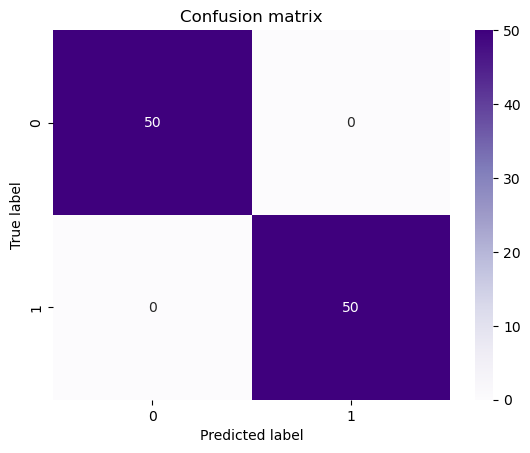

In [10]:
# Iscrtavanje matrice konfuzije
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [11]:
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

[[12  1]
 [ 0 13]]


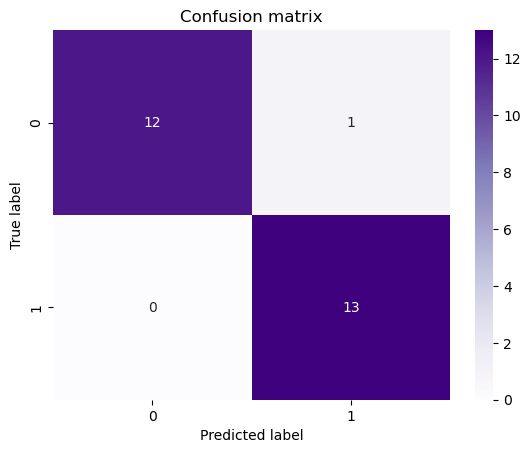

In [12]:
# Iscrtavanje matrice konfuzije
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

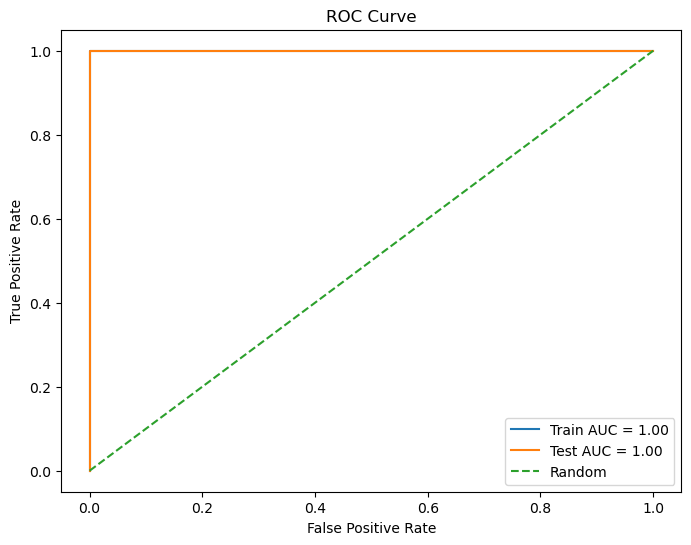

In [18]:
y_train_prob = rf_model.predict_proba(X_train)[:,1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

y_test_prob = rf_model.predict_proba(X_test)[:,1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

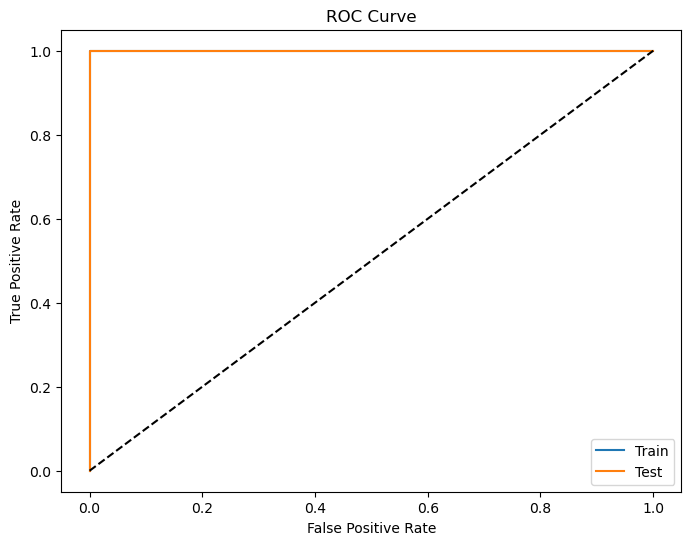

In [15]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()